In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Load the dataset
file_path = "merged_data_final_v2.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()
print(df.columns)


Index(['Tsp', 'Tsr', 'Pts', 'Pnt', 'Time', 'Tn', 'Tp', 'Q', 'E', 'temp', 'dew',
       'humidity', 'snowdepth', 'windspeed'],
      dtype='object')


In [2]:
# Data Cleaning and Feature Engineering
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'])
    df.set_index('Time', inplace=True)
else:
    print("Error: 'Time' column not found in the dataset. Check column names and case.")


# Handle missing values, if any
df.fillna(0, inplace=True)  # Replace with your specific strategy for handling missing values

# Feature engineering
df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['Day_of_Week'] = df.index.dayofweek

# Define features and target variable
#features = ['EMWh','Tn','Tp']
features = ['Tsp', 'Tsr', 'Pts', 'Pnt', 'Tn', 'Tp', 'Q','E']
targets = ['temp', 'dew', 'humidity', 'snowdepth', 'windspeed']



In [3]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train[features], train[targets]
X_test, y_test = test[features], test[targets]




In [4]:
# Train a machine learning model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [5]:
# Make predictions on the test set
predictions = model.predict(X_test)



Mean Squared Error: 71.56305664832095


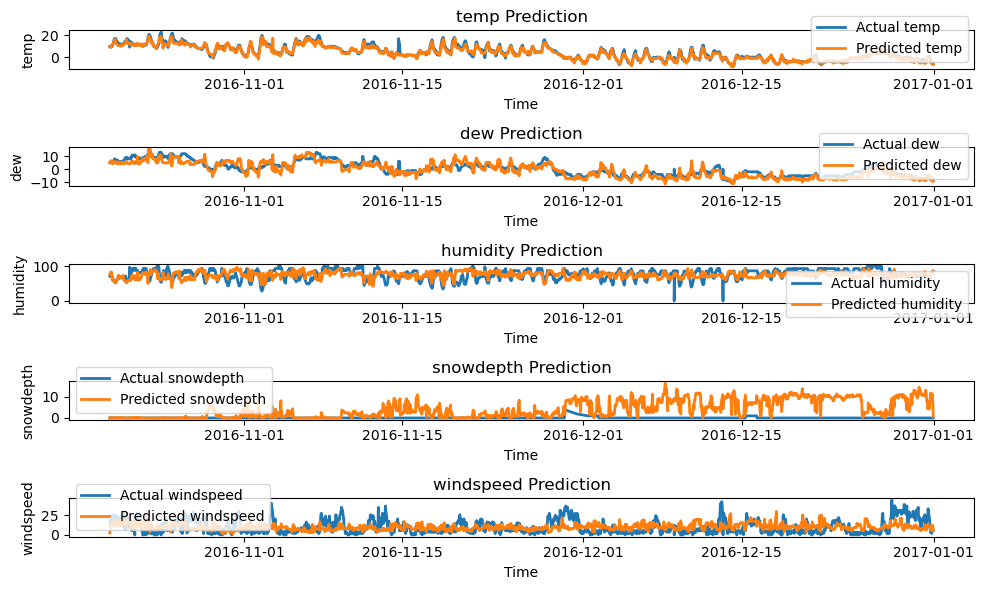

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs. actual values for each target variable
plt.figure(figsize=(10, 6))

for i, target in enumerate(targets):
    plt.subplot(len(targets), 1, i + 1)
    plt.plot(test.index, y_test[target], label=f'Actual {target}', linewidth=2)
    plt.plot(test.index, predictions[:, i], label=f'Predicted {target}', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel(target)
    plt.title(f'{target} Prediction')
    plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Save the model to a file
joblib.dump(model, 'weather-prediction-model-3.pkl')

['weather-prediction-model-3.pkl']